In [85]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


In [2]:
netflix = pd.read_csv("./netflix/netflix_titles.csv").drop(['show_id', 'cast', 'rating', 'duration', 'description', 'director', 'release_year'], axis=1)
netflix.columns = ['종류', '제목', '국가', '등록날짜', '카테고리']
df = netflix.iloc[:, [1, 0, 2, 3, 4]]

# Bird Box
# Klaus
# The Queen's Gambit
# Train to Busan
# MOTHER
# About Time
# Squid Game

df.head()

,제목,종류,국가,등록날짜,카테고리
0,Dick Johnson Is Dead,Movie,United States,"September 25, 2021",Documentaries
1,Blood & Water,TV Show,South Africa,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,TV Show,NaN,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,TV Show,NaN,"September 24, 2021","Docuseries, Reality TV"
4,Kota Factory,TV Show,India,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
df.info()

In [3]:
# 전처리 - 결측값 있는 행 모두 제거
df.dropna(inplace=True)
# df.isna().sum()

# 등록날짜 datetime 형태로 변환 -> 연도만 빼서 column 생성
df["등록날짜"] = pd.to_datetime(df["등록날짜"])
df["연도"] = df["등록날짜"].dt.year
df.tail()

,제목,종류,국가,등록날짜,카테고리,연도
8801,Zinzana,Movie,"United Arab Emirates, Jordan",2016-03-09,"Dramas, International Movies, Thrillers",2016
8802,Zodiac,Movie,United States,2019-11-20,"Cult Movies, Dramas, Thrillers",2019
8804,Zombieland,Movie,United States,2019-11-01,"Comedies, Horror Movies",2019
8805,Zoom,Movie,United States,2020-01-11,"Children & Family Movies, Comedies",2020
8806,Zubaan,Movie,India,2019-03-02,"Dramas, International Movies, Music & Musicals",2019


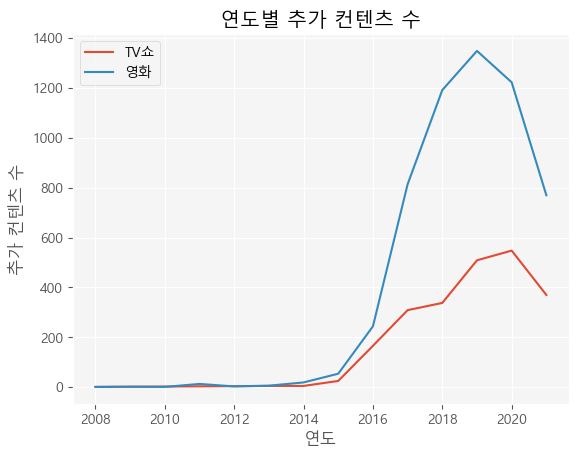

In [7]:
# 연도별 추가 컨텐츠 카운트
year = df["연도"]

type_data = df[['종류', '연도']]
# type_data.head()

TV_show = type_data[type_data["종류"] == "TV Show"].groupby('연도')['종류'].count()
Movie = type_data[type_data["종류"] == "Movie"].groupby('연도')['종류'].count()
samp = type_data.groupby('연도')['종류'].count()

# samp
# TV_show
# Movie

plt.title("연도별 추가 컨텐츠 수")
plt.plot(list(dict(TV_show).keys()), list(dict(TV_show).values()), label="TV쇼")
plt.plot(list(dict(Movie).keys()), list(dict(Movie).values()), label="영화")
plt.xlabel("연도")
plt.ylabel("추가 컨텐츠 수")
# ax = sns.barplot(data=app, x="별점", y="가격", ci=None)
# ax.set(ylabel="평균 가격 (단위: $)")
# plt.legend([], [], frameon=False)
plt.legend()
plt.show()

In [10]:
df[df["제목"] == "Men in Black"]

,제목,종류,국가,등록날짜,카테고리,연도
7442,Men in Black,Movie,United States,2019-10-19,"Action & Adventure, Comedies, Sci-Fi & Fantasy",2019


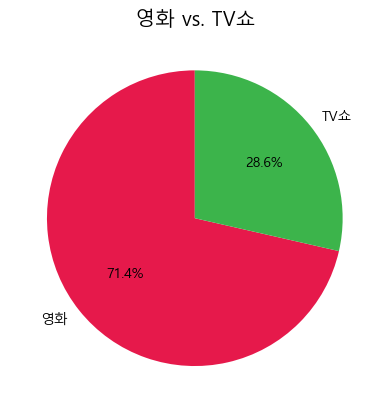

In [86]:
eda1_c = [5, 2]
label_1 = ['영화', 'TV쇼']
eda1_colors = ["#79addc", "#ffc09f", "#ffee93", "#fcf5c7", "#adf7b6", '#AECCA5']
plt.title("영화 vs. TV쇼")
plt.pie(eda1_c, labels=label_1, startangle=90, autopct='%.1f%%', colors=colors2)
plt.show()

[34146, 13656]


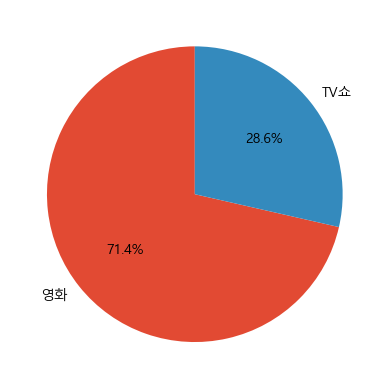

In [95]:
finale_vals = [df[df["종류"] == "Movie"].size, df[df["종류"] == "TV Show"].size]
print(finale_vals)
finale_labels = ['영화', 'TV쇼']
plt.pie(finale_vals, labels=finale_labels, startangle=90, autopct="%.1f%%")
plt.show()

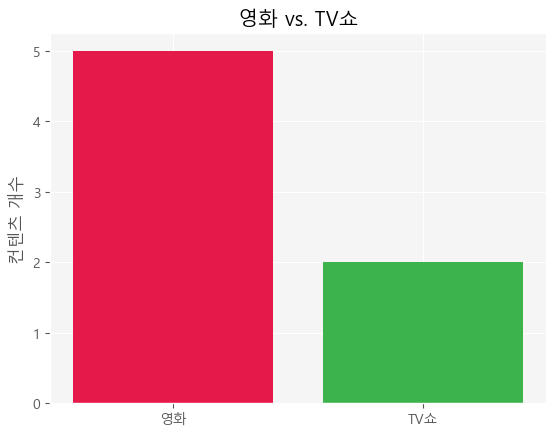

In [83]:

eda1_label = np.array(['영화', 'TV쇼'])
eda1_value = np.array([5, 2])
plt.bar(eda1_label, eda1_value, color=colors2)
plt.title('영화 vs. TV쇼')
plt.ylabel('컨텐츠 개수')
# plt.yticks(np.arange(0, 10, 0.5))
plt.show()

In [42]:
# 번역
from translate import Translator
translator = Translator(to_lang="Korean")
# sample = translator.translate("United States")
# print(sample)

In [ ]:
# 문제 해결
## 국가 카운팅
from collections import Counter
country_data = df['국가']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
top20 = country_counting[:20]
trans_top20 = []

for name in top20.index:
    trans_top20.append(translator.translate(name))

trans_top20[13] = '튀르키예'

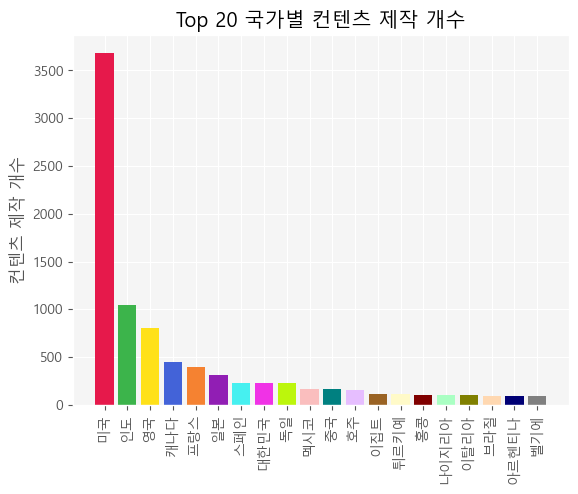

In [61]:
## 시각화
colors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
plt.bar(trans_top20, top20.values, color=colors2)
plt.title("Top 20 국가별 컨텐츠 제작 개수")
plt.ylabel("컨텐츠 제작 개수")
plt.xticks(rotation=90)
plt.show()